## Into DeepTrain
DeepTrain requires only (1) a compiled model and (2) data directory to run.<br>
This example covers these and a bit more to keep truer to standard use.

In [1]:
import os
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.models import Model

from deeptrain import TrainGenerator, DataGenerator

In [2]:
%config InlineBackend.figure_format = 'retina'  # greatly improve display quality

### Model maker
Begin by defining a model maker function. Input should specify hyperparameters, optimizer, learning rate, etc;<br> this is the "blueprint" which is later saved.

In [3]:
def make_model(batch_shape, optimizer, loss, metrics, num_classes,
               filters, kernel_size):
    ipt = Input(batch_shape=batch_shape)

    x = Conv2D(filters, kernel_size, activation='relu', padding='same')(ipt)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(num_classes)(x)

    out = Activation('softmax')(x)

    model = Model(ipt, out)
    model.compile(optimizer, loss, metrics=metrics)
    return model

### Model configs
Define configs dictionary to feed as `**kwargs` to `make_model`; we'll also pass it to TrainGenerator,<br>
which will save it and show in a "report" for easy reference

In [4]:
batch_size = 128
width, height, channels = 28, 28, 1  # MNIST dims (28 x 28 pixels, greyscale)

MODEL_CFG = dict(
    batch_shape=(batch_size, width, height, channels),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam',
    num_classes=10,
    filters=16,
    kernel_size=(3, 3),
)

### DataGenerator (train) configs
- `data_path`:    directory where image data is located
- `labels_path`: where labels file is located
- `batch_size`:  number of samples to feed at once to model
- `shuffle`:     whether to shuffle data at end of each epoch
- `superbatch_set_nums`: which files to load into a `superbatch`, which holds batches persisently in memory <br> 
  (as opposed to `batch`, which is overwritten after use). Since MNIST is small, we can load it all into RAM.

In [5]:
datadir = os.path.join("dir", "data", "image")
DATAGEN_CFG = dict(
    data_path=os.path.join(datadir, 'train'),
    labels_path=os.path.join(datadir, 'train', 'labels.h5'),
    batch_size=batch_size,
    shuffle=True,
    superbatch_set_nums='all',
)

### DataGenerator (validation) configs

In [6]:
VAL_DATAGEN_CFG = dict(
    data_path=os.path.join(datadir, 'val'),
    labels_path=os.path.join(datadir, 'val', 'labels.h5'),
    batch_size=batch_size,
    shuffle=False,
    superbatch_set_nums='all',
)

### TrainGenerator configs
-   `epochs`:   number of epochs to train for
-   `logs_dir`: where to save TrainGenerator state, model, report, and history
-   `best_models_dir`: where to save model when it achieves new best validation performance
-   `model_configs`: model configurations dict to save & write to report

In [7]:
TRAINGEN_CFG = dict(
    epochs=3,
    logs_dir=os.path.join('dir', 'outputs', 'logs'),
    best_models_dir=os.path.join('dir', 'outputs', 'models'),
    model_configs=MODEL_CFG,
)

### Create training objects

In [8]:
model       = make_model(**MODEL_CFG)
datagen     = DataGenerator(**DATAGEN_CFG)
val_datagen = DataGenerator(**VAL_DATAGEN_CFG)
traingen    = TrainGenerator(model, datagen, val_datagen, **TRAINGEN_CFG)

Discovered 48 files with matching format
Discovered dataset with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Preloading superbatch ... Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finished, w/ 4608 total samples
Val initial data prepared
Logging ON; directory (new): dir\outputs\logs\M3__model-adam__min999.000


### Train


Fitting set 1...   (Loss, Acc) = (2.314481, 0.085938) 
Fitting set 2...   (Loss, Acc) = (2.294197, 0.089844) 
Fitting set 3...   (Loss, Acc) = (2.265050, 0.130208) 
Fitting set 4...   (Loss, Acc) = (2.241483, 0.158203) 
Fitting set 5...   (Loss, Acc) = (2.212419, 0.206250) 
Fitting set 6...   (Loss, Acc) = (2.193546, 0.234375) 
Fitting set 7...   (Loss, Acc) = (2.177272, 0.262277) 
Fitting set 8...   (Loss, Acc) = (2.154958, 0.294922) 
Fitting set 9...   (Loss, Acc) = (2.133012, 0.322917) 
Fitting set 10...  (Loss, Acc) = (2.110486, 0.342969) 
Fitting set 11...  (Loss, Acc) = (2.080543, 0.369318) 
Fitting set 12...  (Loss, Acc) = (2.056077, 0.388672) 
Fitting set 13...  (Loss, Acc) = (2.035284, 0.400240) 
Fitting set 14...  (Loss, Acc) = (2.010631, 0.419643) 
Fitting set 15...  (Loss, Acc) = (1.986214, 0.439063) 
Fitting set 16...  (Loss, Acc) = (1.963475, 0.454102) 
Fitting set 17...  (Loss, Acc) = (1.939722, 0.469669) 
Fitting set 18...  (Loss, Acc) = (1.917095, 0.481771) 
Fitting s

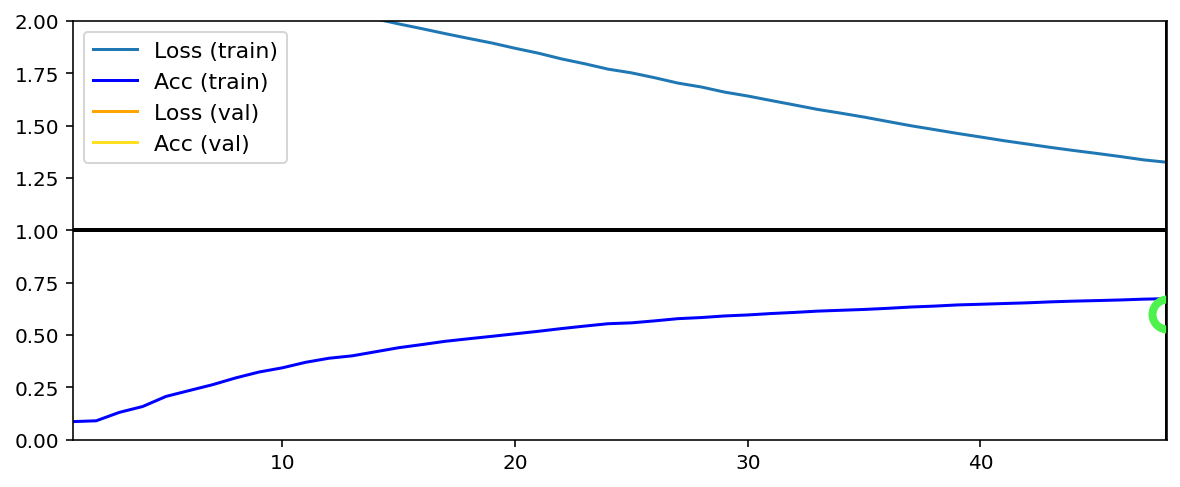


Fitting set 2...   (Loss, Acc) = (0.581046, 0.855469) 
Fitting set 43...  (Loss, Acc) = (0.593312, 0.849609) 
Fitting set 36...  (Loss, Acc) = (0.579878, 0.852865) 
Fitting set 15...  (Loss, Acc) = (0.572826, 0.854492) 
Fitting set 31...  (Loss, Acc) = (0.572737, 0.850781) 
Fitting set 8...   (Loss, Acc) = (0.566198, 0.849609) 
Fitting set 4...   (Loss, Acc) = (0.570968, 0.849888) 
Fitting set 38...  (Loss, Acc) = (0.565497, 0.851074) 
Fitting set 5...   (Loss, Acc) = (0.557865, 0.855469) 
Fitting set 13...  (Loss, Acc) = (0.555604, 0.858203) 
Fitting set 29...  (Loss, Acc) = (0.546591, 0.861151) 
Fitting set 22...  (Loss, Acc) = (0.538503, 0.864258) 
Fitting set 27...  (Loss, Acc) = (0.532123, 0.866286) 
Fitting set 41...  (Loss, Acc) = (0.527561, 0.867467) 
Fitting set 47...  (Loss, Acc) = (0.523106, 0.869531) 
Fitting set 33...  (Loss, Acc) = (0.522746, 0.867432) 
Fitting set 20...  (Loss, Acc) = (0.518890, 0.868796) 
Fitting set 24...  (Loss, Acc) = (0.515792, 0.869575) 
Fitting s

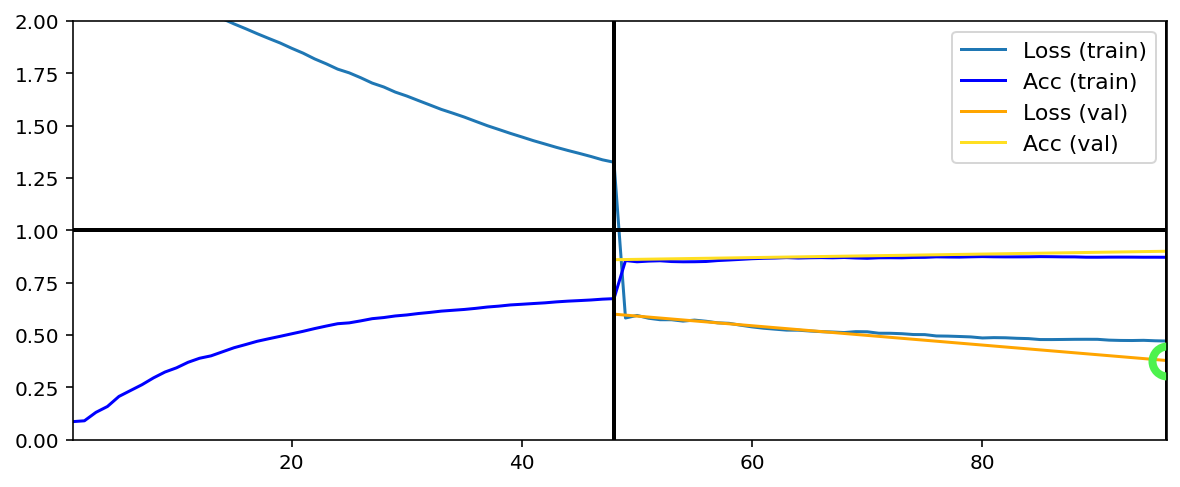


Fitting set 1...   (Loss, Acc) = (0.298572, 0.937500) 
Fitting set 33...  (Loss, Acc) = (0.345706, 0.906250) 
Fitting set 40...  (Loss, Acc) = (0.362649, 0.898438) 
Fitting set 13...  (Loss, Acc) = (0.358171, 0.900391) 
Fitting set 27...  (Loss, Acc) = (0.356352, 0.901563) 
Fitting set 10...  (Loss, Acc) = (0.351182, 0.899740) 
Fitting set 21...  (Loss, Acc) = (0.354584, 0.897321) 
Fitting set 6...   (Loss, Acc) = (0.354517, 0.893555) 
Fitting set 4...   (Loss, Acc) = (0.359249, 0.894097) 
Fitting set 19...  (Loss, Acc) = (0.367290, 0.892188) 
Fitting set 44...  (Loss, Acc) = (0.367109, 0.893466) 
Fitting set 32...  (Loss, Acc) = (0.371878, 0.891927) 
Fitting set 11...  (Loss, Acc) = (0.362920, 0.894832) 
Fitting set 24...  (Loss, Acc) = (0.360544, 0.895647) 
Fitting set 5...   (Loss, Acc) = (0.356714, 0.897917) 
Fitting set 43...  (Loss, Acc) = (0.357425, 0.895996) 
Fitting set 9...   (Loss, Acc) = (0.357274, 0.895680) 
Fitting set 28...  (Loss, Acc) = (0.361710, 0.894097) 
Fitting s

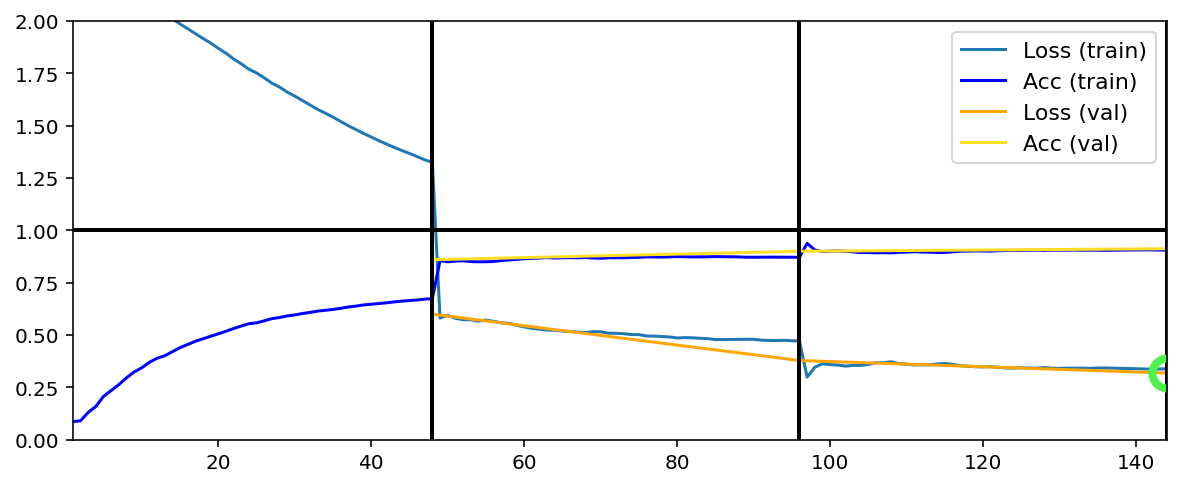

Training has concluded.


In [9]:
traingen.train()

### Delve deeper
DeepTrain offers much beyond the minimals; it's suggested to proceed with the advanced example before
exploring others.